<font size=6>

<b>Curso de Análisis de Datos con Python</b>
</font>

<font size=4>
    
Curso de formación interna, CIEMAT. <br/>
Madrid, Octubre de 2021

Antonio Delgado Peris y Cristina Labajo Villaverde
</font>

https://github.com/andelpe/curso-python-analisis-datos

<br/>

# Tema 7. Análisis de datos exploratorio (EDA) y pre-procesado de datos

Lo más importante a la hora de analizar datos y trabajar con datasets es disponer de unos buenos datos. No sólo tienen que ser lo suficientemente representativos para satisfacer nuestros objetivos, si no que también requieren de un pre-procesado para limpiarlos, reescalarlos, agruparlos, convertir a un formato específico, etc. y así evitar errores en los resultados o resultados poco fidedignos. 

# Objetivos

- Identificar y limpiar los datos de valores \"omitidos\"
- Estandarizar el formato de los datos
- Normalizar los valores de los que disponemos
- Agrupar valores (binning)
- Variables categóricas a variables numéricas
- Explorar los datos de los que disponemos 
- Encontrar relación entre las distintas variables
- Identificar de outliers  


### Importación de librerías


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

##  Estadística descriptiva


Es importante explorar nuestros datos antes de empezar a hacer cálculos complicados con ellos. 
Una vez que tenemos nuestros datos guardados en un dataset podemos aplicar distintos métodos para tener una primera idea del tamaño, rango y otras medidas estadísticas de interés, tales como el valor medio, máximos, mínimos, etc. que luego podemos necesitar para pre-procesar nuestros datos. 


La estadística descriptiva ayuda a describir las características básicas de un conjunto de datos de manera rápida.

El modo más común de obtener estos datos es la función `df.describe()` de pandas aplicada a nuestro dataset.



In [2]:
##EJEMPLO COCHES
coches=pd.read_csv('./data/auto-mpg.data',sep='\s+', header=None)
coches.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
coches=coches.replace('?', np.nan)
coches.dropna(inplace=True)
coches.reset_index( inplace=True)


In [3]:
coches.describe()

,index,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,197.579082,23.445918,5.471939,194.411990,2977.584184,15.541327,75.979592,1.576531
std,114.534637,7.805007,1.705783,104.644004,849.402560,2.758864,3.683737,0.805518
min,0.000000,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,98.750000,17.000000,4.000000,105.000000,2225.250000,13.775000,73.000000,1.000000
50%,197.500000,22.750000,4.000000,151.000000,2803.500000,15.500000,76.000000,1.000000
75%,295.250000,29.000000,8.000000,275.750000,3614.750000,17.025000,79.000000,2.000000
max,397.000000,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Esta función muestra estadísticas básicas de cada variable, tales como la media, el total de datos, la desviación estandar, los cuartiles y el máximo y mínimo. 




También podemos usar la función `.info()` que nos dará otro tipo de información, como el rango del índice de nuestros datos (número de filas) y datos de nuestras columnas, como el tipo de datos

In [4]:
## EJEMPLO TRABAJADORES EMPRESA
datos = [
    {'Nombre': 'Juan', 'Sexo':'Hombre','Edad': 42, 'Departamento': 'Comunicación'},
    {'Nombre': 'Laura', 'Sexo':'Mujer','Edad': 44, 'Departamento': 'Administración'},
    {'Nombre': 'Pepe', 'Sexo':'Hombre','Edad': 37, 'Departamento': 'Ventas'},
    {'Nombre': 'Carlos', 'Sexo':'Hombre','Edad': 15, 'Departamento': 'Ventas'},
    {'Nombre': 'Esther', 'Sexo':'Mujer','Edad': 62, 'Departamento': 'Administración'},
    {'Nombre': 'Álvaro', 'Sexo':'Hombre','Edad': 62, 'Departamento': 'Ventas'},
    {'Nombre': 'Rosa', 'Sexo':'Mujer','Edad': 50, 'Departamento': 'Comunicación'}
]

empresa = pd.DataFrame(datos)
empresa

,Nombre,Sexo,Edad,Departamento
0,Juan,Hombre,42,Comunicación
1,Laura,Mujer,44,Administración
2,Pepe,Hombre,37,Ventas
3,Carlos,Hombre,15,Ventas
4,Esther,Mujer,62,Administración
5,Álvaro,Hombre,62,Ventas
6,Rosa,Mujer,50,Comunicación


In [5]:
empresa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Nombre        7 non-null      object
 1   Sexo          7 non-null      object
 2   Edad          7 non-null      int64 
 3   Departamento  7 non-null      object
dtypes: int64(1), object(3)
memory usage: 352.0+ bytes


Aunque para saber las dimensiones de nuestro dataset la manera más rápida es usar la función `.shape` que nos devuelve dos números, el primero es el número de filas y el segundo el número de columnas. 

In [6]:
empresa.shape

(7, 4)

También podemos ver cuantas veces se repite cada valor, lo que nos puede dar una idea de la distribución general, usando la función `df.col.value_counts()`

In [7]:
empresa.Sexo.value_counts()

Hombre    4
Mujer     3
Name: Sexo, dtype: int64

Los **histogramas** también pueden ser útiles para ver la distribución de nuestros datos. 


In [ ]:
##EJEMPLO Coches CO2 emissions
df4 = pd.read_csv("./data/FuelConsumption.csv")
coches2 = df4[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']] 
coches2 ## Datasat reducido con variables de interés

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(
        data    = coches2,
        x       = 'ENGINESIZE',
        stat    = "count",
        kde     = True,
        color   = 'green',
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[0])
axes[0].set_title('Engine Size', fontsize = 10, fontweight = "bold")
axes[0].tick_params(labelsize = 8)


sns.histplot(
        data    = coches2,
        x       = 'CO2EMISSIONS',
        stat    = "count",
        kde     = True,
        color   = 'orange',
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[1])
axes[1].set_title('Emisiones CO2', fontsize = 10, fontweight = "bold")
axes[1].tick_params(labelsize = 8)

##  Missing values


Podemos encontrarnos con que faltan valores en nuestros datasets, esto puede deberse a que no se han guardado algunas variables de un evento, y podemos encontrarlos representados de diferentes maneras, como 0, NaN, espacios en blanco o símbolos de puntuación. 

Primero, es necesario detectar si tenemos valores nulos u omitidos en nuestro dataset y eso lo podemos hacer usando la función de pandas `.isnull()` combinado con el método `.any` para saber si hay algún valor en el conjunto de nuestro dataset. 


In [ ]:
## EJEMPLO Dataset Titanic
titanic = sns.load_dataset("titanic")
titanic.head(10)

In [ ]:
titanic.isnull().any()

Vemos qué columnas tienen datos nulos (True), lo que nos sirve para identificarlas y saber dónde enfocarnos a la hora de eliminar o cambiar valores. Además, podemos intentar saber el número exacto de datos nulos que tenemos, por ejemplo en una columna en particular. 

In [ ]:
print('Valores nulos en columna\'deck\':', titanic['deck'].isnull().sum())
print('Tamaño dataset Titanic:', titanic.shape)


Se pueden considerar diferentes estrategias para enfrentarnos a estos valores omitidos y eso va a depender de la situación, el tipo de dato y la experiencia del investigador. Los distintos métodos para solucionar los espacios en blanco son los siguientes: 

- Revisar los datos e intentar recuperar el valor desconocido. 
- Eliminar los datos omitidos
    - Eliminar la variable entera 
    - Eliminar esa entrada de datos (la fila)
- Sustituir valores
    - Variables numéricas:
        - Reemplazarlos por la media de la variable 
    - Variables categóricas:
        - Reemplazarlos por la moda   
        - Reemplazar los valores basandonos en conocimiento previo
- Dejar en blanco los valores que faltan



### Eliminar los datos omitidos


Pandas tiene una función que se encarga de eliminar datos que no son válidos o en blanco: `df.dropna()`

Es necesario especificar el eje que queremos eliminar:
- `axis=0` elimina la fila entera, la entrada que presenta problemas
- `axis=1` elimina la columna, la variable

Otros de los parámetros de la función que hay que configurar son la columna en la que se encuentra el NaN y si queremos mantener el índice cuando eliminemos los datos vacíos. 



In [ ]:
del_titanic=titanic.copy()
del_titanic.dropna(subset=['deck'], axis=0, inplace=True)  ##Sin el parámetro 'inplace=True' el dataset no se modifica. 
del_titanic.reset_index(drop=True, inplace=True) #Restablecemos el índice para que no haya problemas en futuras operaciones.
del_titanic.head()

(Otro modo puede ser transformar a 0 los NaN y seleccionar las líneas que no contengan ceros, pero esta solución sólo sería válida si tenemos datos que no son nulos.)

### Sustituir valores

Para sustituir un dato vacío por otro valor se puede usar la función `df.replace(valor_omitido, nuevo_valor)`.

También pandas tiene una función especifica para los valores omitidos:`df.fillna(nuevo_valor)`

Pongamos el ejemplo del dataset anterior. En este caso querríamos reemplazar el valor NaN por el valor de la columna 'deck' que más veces se repite, o lo que es lo mismo, la moda. 
Primero habría que calcular la moda con `df.col.mode()`


In [72]:
## Hallamos la moda
md=titanic.deck.mode()[0]
## En este caso la moda es de todo el dataset, pero también puedes hacer la moda de un grupo concreto.
print('La moda de la columna \'deck\' es: ',md)
#Sustituimos valores nan por la moda
md_titanic=titanic.copy()
md_titanic.deck=md_titanic['deck'].fillna(md)
md_titanic.head(10)

La moda de la columna 'deck' es:  C


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,C,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,C,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,C,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,C,Cherbourg,yes,False


In [75]:
# Aplicamos la función replace
md_titanic.age = md_titanic.age.replace(np.nan, 0)
  
# print the DataFrame
md_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
5,0,3,male,0.0,0,0,8.4583,Q,Third,man,True,C,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,C,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,C,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,C,Cherbourg,yes,False


<div style="background-color:powderblue;">

**EJERCICIO e7_1:** 

Dado el dataset `ejer1` remplaza los NaN de cada columna por la media de su correspondiente columna.

In [ ]:
import pandas as pd
ejer1 = pd.DataFrame({'a':[None, 3, None, 5, 6], 'b':[1, 3, 4, 6, None], 'c':[54, None, None, 32, 21]})
ejer1

In [ ]:
## Escribir aquí



## Formateo de datos

Puede darse el caso de que recolectemos datos de distintas fuentes, o que los registren diferentes personas por lo que los datos pueden presentar distintas nomenclaturas o no ser constantes en términos de unidades y formatos. En este caso resulta difícil comparar los datos o agruparlos por lo que es necesario formatearlos y definir un formato único que haga más fácil las futuras operaciones. 

En el caso en que se requiera una conversión de unidades, por ejemplo pasar los datos de peso de libras a kilos, deberíamos de dividir las libras entre 0,45359237 para pasarlo a kilogramos. Podemos modificar la columna de las libras de la siguiente manera:

`df['libras']=df['libras']/0,45359237`

Consejo extra: Como ahora hemos cambiado de libras a kilogramos, si quisieramos cambiar el nombre de la columna a 'kilogramos' lo haríamos de la siguiente manera:

`df.rename(columns={'libras':'kilogramos'}, inplace=True)`

Es importante prestar atención al tipo de datos que tenemos. Si no son los correctos puede haber errores en las operaciones cuando construyamos modelos. 

Cuando introducimos datos en python puede ocurrir que se registren como un tipo distinto al que deseamos. Es necesario comprobar el tipo de datos y ver si se corresponden con lo que debería ser para que no interfiera en nuestros futuros cálculos, si este no fuera el caso, se debe de cambiar el tipo de datos. 

Para identificar qué tipos de datos tenemos usamos la función `dtypes`

In [ ]:
coches

In [ ]:
coches.dtypes

Si fuese necesario cambiar el tipo, por ejemplo, si la columna de "precios" de un dataset de pisos en venta tiene type object significa que ha registrado el precio como un string, no como un número (entero o decimal). 

Para cambiar el type a float se usa la función `astype` especificando el tipo al que vamos a convertir la variable de la siguiente manera:

In [ ]:
coches.iloc[:,:-1] = coches.iloc[:,:-1].astype(float)
coches.dtypes

<div style="background-color:powderblue;">

**EJERCICIO e7_2:** 

Convertir la columna `mpg` (miles per gallon) del dataframe `ejer_coches` a L/100km.
    
La fórmula a sefuir es la siguiente $L/100km = 235 / m.p.g.$

Cambiar el nombre de la columna a `L/100km`

Comprobar el tipo de la columna modificada

In [ ]:
ejer_coches=coches.copy()
## Escribir aquí


## Normalización

Muchas veces, dependiendo de la naturaleza de los datos, nos encontramos con que hay gran variación de rango entre una columna y otra. Por ejemplo en el siguiente dataframe de casas, entre el precio y el número de habitaciones.

In [ ]:
## EJEMPLO CASAS
casas=pd.read_csv('./data/kc_house_data.csv', header='infer')
casas


En estos casos puede venir bien normalizar nuestros datos. Normalizar significa, en este caso, comprimir o extender los valores de la variable para que estén en un rango definido y hacer que los datos sean más uniformes, y será de ayuda para los futuros cálculos estadísticos que queramos hacer con nuestros dataset. 

La normalización hace posible la comparación entre distintas variables (features) y hace que todas tengan el mismo impacto en los cálculos. Además, facilita la computación haciendo los cálculos menos pesados.

Pero no existe un método ideal de normalización que funcione para todas las formas de variables. Es trabajo del científico conocer cómo se distribuyen los datos, saber si existen anomalías, comprobar rangos, etc.

Hay varios métodos para normalizar, pero a continuación explicaremos tres y veremos cómo se implementan en python:


### Escalado de variables (Feature Scaling):

#### Simple

  
  
  

$$x_{new} = \frac{x_{old}}{x_{max}}$$

Se divide cada valor por el máximo valor de esa variable. El nuevo rango de la variable es entre [0,1].

Esto aplicado a nuestro dataset sería de la siguiente forma:


In [ ]:
price_norm_max=casas['price']/casas['price'].max()
price_norm_max

#### Min-Max


$$x_{new} = \frac{x_{old} - x_{min}}{x_{max}- x_{min}}$$

El nuevo valor es el resultado de dividir la resta del valor antiguo menos el valor mínimo de la variable por el rango de dicha variable (máximo - mínimo). El nuevo rango de la variable es entre [0,1].

Siguiendo el ejemplo anterior pero aplicando la normalización Min-Max:


In [ ]:
price_norm_minmax=(casas['price']-casas['price'].min())/(casas['price'].max()-casas['price'].min())
price_norm_minmax

El problema de este tipo de normalizacion, es que comprime los datos de entrada entre unos límites empíricos (el máximo y el mínimo de la variable). Esto quiere decir que si existe ruido, éste va a ser ampliado.  Esto nos dice que este método de normalización no es adecuado para señales estables.

### Escalado estándar (Z-score)

Es una medida de cuántas desviaciones estándar por debajo o por encima de la media se encuentra una puntuación concreta. Son una forma de comparar los resultados con una población "normal". La Z-score indica dónde se encuentra la puntuación en una curva de distribución normal. Un puntaje z de cero le indica que los valores son exactamente la media, mientras que un puntaje de +3 le indica que el valor es mucho más alto que la media.

<center>
<img src="./images/t7_zscore.jpg" alt="Drawing" style="width: 250px;"/>
</center>
    

$$x_{new} = \frac{x_{old} - \mu }{\sigma}$$


Para cada valor se resta la media y se divide por la deviación estándar. Los valores resultantes suelen ser cercanos a 0, normalmente en un rango de [-3,3] deviaciones estándar, pero pueden ser mayores o menores también.


Finalmente aplicamos el Z-score a nuestros datos, usando la función `.mean()`para calcular la media y `.std()`para calcular la deviación estándar: 


In [ ]:
co2_norm_zscore=(coches2['CO2EMISSIONS']-coches2['CO2EMISSIONS'].mean())/coches2['CO2EMISSIONS'].std()
co2_norm_zscore

También la librería scipy nos ofrece una fórmula que nos lo calcula directamente: `stats.zscore()`

In [ ]:
from scipy import stats
ZS=stats.zscore(coches2['CO2EMISSIONS'])
print(ZS[0:10])

<div style="background-color:powderblue;">

**EJERCICIO e7_3:** 

Normaliza el dataset ejer_coches2 utilizando la función Min-Max. Cada columna debe ir normalizada usando el máximo y mínimo correspondiente. 

Comprobar que los valores resultantes están en el rango [0,1]

In [ ]:
ejer_coches2=coches2.copy()
##Escribir aquí


## Discretización (Binning)

Binning es la agrupación de los datos en 'bins', o porciones de acuerdo con criterios definidos.

Uno de los casos más comunes de binning se realiza entre bastidores al crear un histograma.Un histograma es una representación gráfica de una variable en forma de barras, donde la altura de cada barra cuya altura dependerá de la frecuencia de los datos representados. Ya hemos visto con anterioridad como hacer histogramas en pandas.

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
coches2['CO2EMISSIONS'].plot(kind='hist',edgecolor='black', bins=10)

Esta división nos permite hacernos una idea de cuantos elementos tenemos en cada grupo o *bin*. Así podemos ver la distribución de nuestros datos. 
Existen dos funciones en pandas que se usan para dividir nuestros datos en bins y cada una tiene sus características y usos particulares.
- [`cut`](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)
   
   Usamos la función `cut` para indicarle a python que queremos dividir nuestras muestras en intervalos de igual tamaño y esta función se encarga de hacer los cálculos necesarios para definir los límites de los bins. 

In [ ]:
pd.cut(coches2['CO2EMISSIONS'], bins=4)

In [ ]:
pd.cut(coches2['CO2EMISSIONS'], bins=4).value_counts()

Además, con esta función se puden especificar los límites de los bins que se quieran usar.Podremos saber exactamente cuantos elementos hay en cada bin usando la función `.value_counts()`

In [ ]:
bins = pd.IntervalIndex.from_tuples([(0.0, 90.0), (91.0,251.0), (252.0, 488.0)])
cont=pd.cut(coches2['CO2EMISSIONS'], bins)
print(cont)
cont.value_counts()

In [ ]:
coches2['CO2EMISSIONS'].plot.hist(bins=4,edgecolor='black')

- [`qcut`](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)
La documentación de pandas describe `qcut` como una "función de discretización basada en cuantiles". `qcut` calculará el tamaño de cada bin para asegurarse de que la distribución en los bins es la misma (más o menos) en todos ellos. Esto supondrá que los bins no serán de igual tamaño, el rango variará, pero todos tendrán el mismo número de observaciones. 


In [ ]:
h= pd.qcut(coches2['CO2EMISSIONS'], q=5)
print(h)

In [ ]:
h.value_counts()

Con el método `qcut` puedes dividir los bins basandote en los cuartiles, pero no puedes definir los límites de los bins explícitamente, a diferencia del método `cut`.

In [ ]:
coches2['CO2EMISSIONS'].describe()

In [ ]:
pd.qcut(coches2['CO2EMISSIONS'], q=[0, 0.25, 0.5, 0.75, 1], retbins=True)

Algunas veces agrupar nuestros datos puede mejorar la precisión de nuestros modelos predictivos y ayuda a tener una visualización más representativa de la distribución de nuestros datos. 
Otra aplicación que puede tener el hacer binning es la de poner etiquetas a los distintos grupos y convertir variables numéricas en variables categóricas. 

Por ejemplo, usando `cut` podemos clasificar los coches del ejemplo anterior en 'poco contaminantes' - 'muy contaminantes' dependiendo de las emisiones de CO2: 


In [ ]:
labels_emissions=['Muy poco','Poco','Normal','Mucho']
contaminantes_bins = pd.cut(coches2['CO2EMISSIONS'],bins=4,labels=labels_emissions,retbins=True)
contaminantes_bins

<div style="background-color:powderblue;">

**EJERCICIO e7_4:** 

Clasifica a los trabajadores de una empresa en grupos de edad (categóricos) usando la función cut. 


In [ ]:
ejer_edad=empresa.copy()
##Escribir aquí

## Pasar de variables categóricas a variables numéricas 

Para poder hacer operaciones sobre nuestros datos o construir modelos (clases de python que representan funciones matemáticas, ej:LinearRegression) la gran mayoría de veces requieren que nuestras variables sean numéricas. Por lo tanto, cuando tenemos variables categóricas (strings) tenemos que convertirlas a numéricas. Existen diferentes métodos para esto:


### Convención

Se puede establecer un código para poner etiquetas a las distintas categorias que tengamos de forma manual, por ejemplo, si quisieramos cambiar la variable 'Sexo' del siguiente dataset a numérico, podrías acordar previamente que 'Mujer'=1 y 'Hombre'=2.


Nombre | Sexo | Sexo_num
:--------: | ------- | --------
Juan | Hombre | 2
Laura| Mujer | 1
Pepe| Hombre | 2
Carlos| Hombre | 2 
Esther | Mujer | 1 
Álvaro | Hombre | 2 
Rosa | Mujer | 1 


De este modo tendríamos la variable convertida a numérico. El código para conseguirlo sería el siguiente:

In [ ]:
empresa["Sexo_num"] = empresa.apply(lambda x: 1 if x["Sexo"] == 'Mujer' else 2, axis=1)
empresa[['Nombre','Sexo','Sexo_num']]

### One-hot encoding

Este método consiste en crear unas variables extras con el nombre de cada etiqueta e indicar con 1s y 0s la categoría a la que pertenece cada evento (1=si, 0=no).
Por ejemplo, fijémosnos en la clase en la que viajaban los pasajeros del Titanic. Una variable categórica que puede ser Primera, Segunda o Tercera (First, Second, Third):


In [ ]:
titanic

Al hacer One Hot Encoding crearemos tres nuevas variables, cada una con el nombre de uno de los valores de titanic['class'] y estas clases 

Hay que tener en cuenta, que no importa el número de categorías o etiquetas que tengamos, sólo una de ellas puede ser 1 siendo el resto 0. 

Para poder crear estas variables ficticias o "dummy variables" se usa la función de pandas [`.get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [ ]:
pd.get_dummies(titanic['class'])

<div style="background-color:powderblue;">

**EJERCICIO e7_5:** 

Dado el dataset `ejer_empresa` convierte a numérico los departamentos a los que pertenecen los trabajadores usando One-Hot-Encoding y añádelo al dataset. Por último elimina la columna `Departamento`.

In [ ]:
ejer_empresa=empresa.copy()
##Escribir aquí

### Boxplots

El diagrama de cajas o *boxplot* es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, se muestran a simple vista la mediana y los cuartiles de los datos y también pueden representarse sus valores atípicos.
También proporcionan una visión general de la simetría de la distribución de los datos; si la mediana no está en el centro del rectángulo, la distribución no es simétrica.

Usaremos la librería seaborn para construir los diagramas de cajas, más concretamente la función [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

Si lo que queremos es agrupar los datos dependiendo de otra variable, la definiremos en el eje x

Text(0.5, 1.0, 'Boxplot Edad dividido por Sexo')

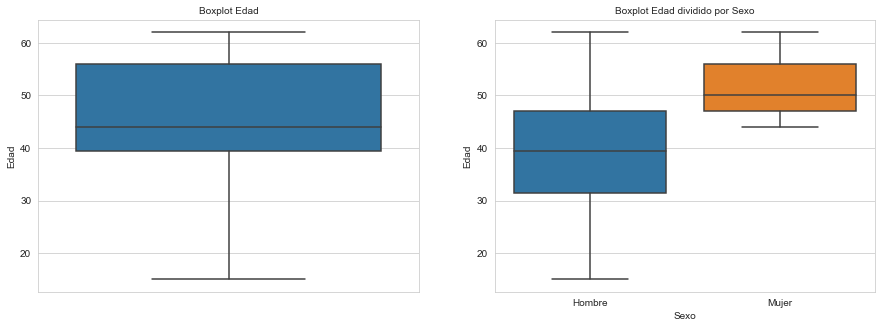

In [44]:
## Boxplot vertical
figure,axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.boxplot(y=empresa.Edad, data=empresa, ax=axes[0])
axes[0].set_title('Boxplot Edad',fontsize = 10)
sns.boxplot(x=empresa.Sexo,y=empresa.Edad, data=empresa, ax=axes[1])
axes[1].set_title('Boxplot Edad dividido por Sexo',fontsize = 10)

<div style="background-color:powderblue;">

**EJERCICIO e7_6:** 

Dado el dataset `ejer_titanic` visualizar usando un boxplot la edad de mujeres y hombres que había en el titanic, clasificados por la clase en la que viajaban (Lo tenemos numérico en la variable `pclass`).

In [45]:
ejer_titanic=titanic.copy()
## Escribir aquí


## Correlación

La correlacción es un método usado en estadística para saber hasta que punto dos variables son independientes entre sí, cómo afecta el cambio de una de estas variables a la otra.

Por ejemplo: 
  - Calor -> Venta de ventiladores
  - Navidades -> Consumo de turrón

Esta relación no tiene por qué ser de causalidad. 

Vamos a ver el ejemplo práctico de correlación entre el precio de una casa y los pies la superficie habitable de esta. Para visualizarlo de la mejor manera posible usamos un scatter plot, o gráfico de dispersión en el que mostraremos además la recta de regresión lineal. Para ello usaremos la función `sns.regplot`  que nos lo hace directamente. 

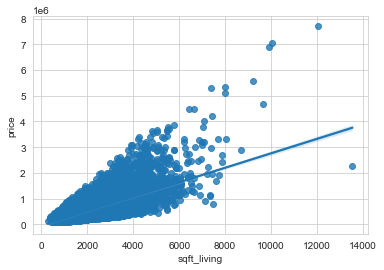

In [46]:
ax=sns.regplot(x='sqft_living',y='price',data=casas)

En este ejemplo, vemos que la recta tiene una pendiente positiva, que nos indica que el valor medio de los edificios tiene relación con el número total de superficie habitable. Una pendiente negativa indicaría una correlación inversa y una pendiente cercana a cero (línea horizontal) nos indicaría que no hay correlación entre esas dos variables. 
No se puede usar variables que tengan poca correlación para predecir valores. 

### Coeficiente de Pearson

La correlación de Pearson es la medida de cuán fuerte es una correlación. Nos da dos valores: El coeficiente de correlación y el P-value
- Coeficiente de Correlación
    
Nos muestra el grado de correlación entre dos variables. El rango de este coeficiente es [-1,1]. Si el valor se acerca a -1 nos indica que hay una fuerte correlación y que esta es negativa, si el valor es cercano a 1 es una correlación fuerte y positiva y si es 0 significa que no hay correlación.  

- P-value

Nos dice lo seguros que estamos de la correlación dada por el coeficiente de correlación, o lo que es lo mismo, cuánto de verdad hay en nuestros cálculos. 
Un P-value < 0.001 indica gran veracidad de los cálculos. Un valor entre 0,001 y 0,05 nos da una certeza moderada. Un valor entre 0,05 y 0,1 nos dará una certeza débil. Y un valor P mayor que 0,1 no nos dará ninguna certeza de correlación. 

Una correlación fuerte tiene que cumplir ambos criterios, un coeficiente cercano a 1 o -1 y un P-value lo más bajo posible.
Vamos a usar la función [`.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)de la librería scipy que contiene herramientas y algoritmos matemáticos y vamos a ver lo fuerte o débil que es la correlación entre el número de habitaciones y el precio de los edificios del ejemplo anterior. 


In [47]:
from scipy import stats
pearson_coef,p_value=stats.pearsonr(casas.price,casas.sqft_living)
print('Coeficiente de Pearson:',pearson_coef)
print('\nP-value:',p_value)

Coeficiente de Pearson: 0.7020350546118

P-value: 0.0


Otra forma de representar estos coeficientes de Pearson son los llamados *"heat maps"* o mapas de calor, donde de manera visual podemos hacernos una idea de los grados de correlación entre las variables de nuestro data set entero. 
Es una matriz de colores, en los que cada color representa un valor del coeficiente. 
Utilizaremos el método `heatmap()` de Seaborn para trazar la matriz.

Para crear los heat maps usamos la función `.corr` de pandas que, por defecto, calcula el coeficiente de correlación de Pearson pero también podemos especificar la utilización de otros métodos de correlación pasando un valor apropiado al parámetro “método”.



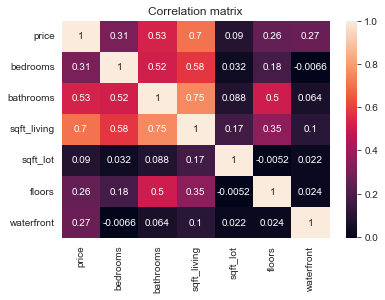

In [48]:
sub=casas.iloc[:,2:9]
correlation_mat = sub.corr()
sns.heatmap(correlation_mat, annot = True)#El parámetro ‘annot=True’ muestra los valores del coeficiente de correlación en cada celda.
plt.title('Correlation matrix')
plt.show()


Si nos fijamos , la diagonal de la matriz es todo 1s, que es la correlación de cada variable con sí misma, obviamente, esta es máxima.

Un **valor positivo grande (cercano a 1)** indica una fuerte correlación positiva, es decir, si el valor de una de las variables aumenta, el valor de la otra variable aumenta también.

Un **valor negativo grande (cercano a -1)** indica una fuerte correlación negativa, es decir, que el valor de una de las variables disminuye al aumentar el de la otra y viceversa.

Un **valor cercano a 0 (tanto positivo como negativo)** indica la ausencia de cualquier correlación entre las dos variables, y por lo tanto esas variables son independientes entre sí.

# Outliers 

Un valor atípico o *outlier* es una observación que difiere de los datos que de otro modo estarían bien estructurados. Es un valor que numéricamente es muy distinto al resto de los datos, lo que puede afectar a nuestros datos. Por ejemplo, si tenemos datos de emisiones de CO2 de coches y uno de ellos resulta que tenía un problema de fábrica y emitía más. 
Ese dato nos va a afectar a la media y a los cuartiles, y puede ser que queramos identificar ese dato para poder eliminarlo de nuestro dataset.

**¡OJO!** Es muy necesario conocer la naturaleza de nuestros datos, y saber si la eliminación de esos outliers va a perjudicar a mi objetivo. No es lo mismo eliminar un dato, como el ejemplo anterior en un estudio sobre la emisión de CO2 de coches en buen estado que en un ensayo científico donde eliminar datos anómalos puede considerarse falseo de datos. 


Podemos hacernos una idea de nuestros datos haciendo un histograma, pues veremos la distribución. En los boxplots también están representados los outliers.

<AxesSubplot:ylabel='Frequency'>

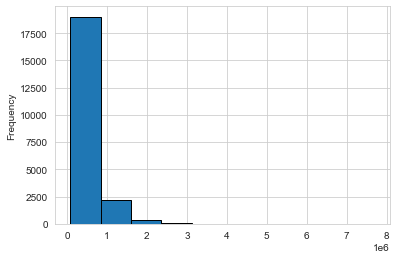

In [49]:
casas.price.plot(kind='hist',edgecolor='black', bins=10)

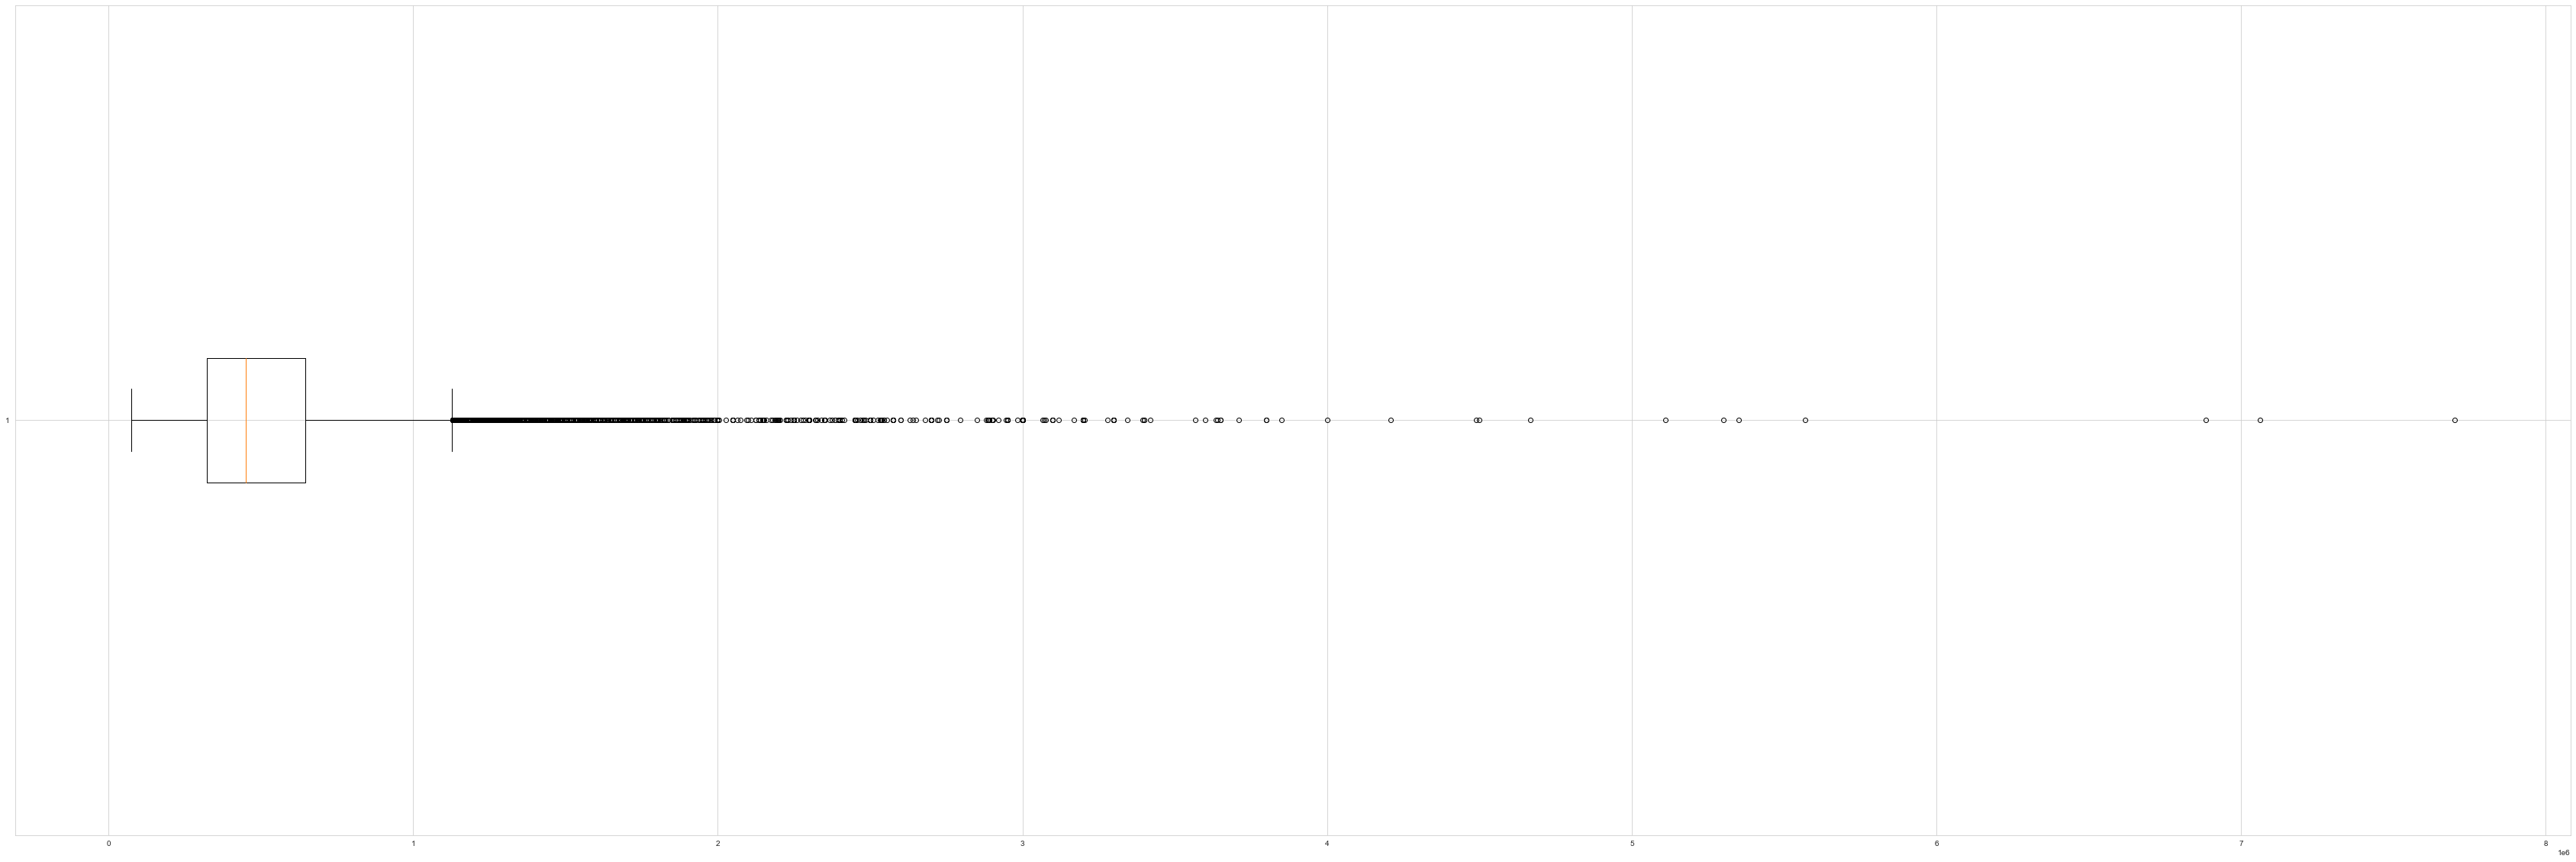

In [50]:
plt.figure(figsize=(60,20))
plt.boxplot(casas.price, vert=False)
plt.show()

# plt.figure(figsize=(60,20))
# plt.boxplot(coches2.CO2EMISSIONS, vert=False)
# plt.show()

Una manera de eliminarlos es usar los Z-score que hemos visto con anterioridad. Si se alejan más de 3 deviaciones estándar de la media pueden considerarse outliers, con lo que podríamos eliminar todos aquellos datos que no cumplan esa norma.

In [51]:
#Primero calculamos los Z-scores de la columna que nos interesa analizar.
ZS=stats.zscore(casas.price)
ZS

0       -0.866717
1       -0.005688
2       -0.980849
3        0.174090
4       -0.081958
           ...   
21608   -0.490545
21609   -0.381588
21610   -0.375865
21611   -0.381588
21612   -0.585882
Name: price, Length: 21613, dtype: float64

In [52]:
casas['abs_z_scores'] = np.abs(ZS) #Nos quedamos con el valor absoluto
new_casas=casas[casas['abs_z_scores'] < 3] #Seleccionamos sólo aquellos que tienen un Z-score menor de |3|
new_casas.shape #Hemos eliminado elementos

(21207, 22)

Sin embargo, en otras ocasiones precisamente lo que nos interesa no es eliminar los outlier si no detectarlos, por ejemplo, en un log de un ordenador valores anómalos pueden indicar una sobrecarga del sistema o un ataque cibernético. Si este fuera el caso podríamos proceder de la misma manera que en el ejemplo anterior, pero en vez de eliminar esos datos los guardaríamos en otra variable.

In [53]:
casas['abs_z_scores'] = np.abs(ZS) #Nos quedamos con el valor absoluto
outliers_casas=casas[casas['abs_z_scores'] >= 3] #Seleccionamos sólo aquellos que tienen un Z-score mayor o igual de |3|
print(outliers_casas.shape) #Nos hemos quedado con los outliers
outliers_casas

(406, 22)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,abs_z_scores
21,2524049179,20140826T000000,2000000.0,3,2.75,3050,44867,1.0,0,4,...,2330.0,720,1968,0,98040,47.5316,-122.233,4110,20336,3.976675
153,7855801670,20150401T000000,2250000.0,4,3.25,5180,19850,2.0,0,3,...,3540.0,1640,2006,0,98006,47.5620,-122.162,3160,9750,4.657654
246,2025069065,20140929T000000,2400000.0,4,2.50,3650,8354,1.0,1,4,...,1830.0,1820,2000,0,98074,47.6338,-122.072,3120,18841,5.066241
269,7960900060,20150504T000000,2900000.0,4,3.25,5050,20100,1.5,0,2,...,4750.0,300,1982,2008,98004,47.6312,-122.223,3890,20060,6.428198
282,7424700045,20150513T000000,2050000.0,5,3.00,3830,8480,2.0,0,1,...,2630.0,1200,1905,1994,98122,47.6166,-122.287,3050,7556,4.112871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21514,3262300818,20150227T000000,1865000.0,4,3.75,3790,8797,2.0,0,0,...,3290.0,500,2006,0,98039,47.6351,-122.236,2660,12150,3.608947
21530,8964800330,20150407T000000,3000000.0,4,3.75,5090,14823,1.0,0,0,...,4180.0,910,2013,0,98004,47.6200,-122.207,3030,12752,6.700590
21540,715010530,20150113T000000,1881580.0,5,3.50,4410,13000,2.0,0,3,...,2920.0,1490,2014,0,98006,47.5382,-122.111,5790,12969,3.654109
21568,524059330,20150130T000000,1700000.0,4,3.50,3830,8963,2.0,0,0,...,3120.0,710,2014,0,98004,47.5990,-122.197,2190,10777,3.159501


## Análisis estadístico con Sklearn

Para el tratamiento con datos usando Python las librerías más comunes son **Numpy**, **Pandas** y **Scipy**, como ya hemos visto anteriormente.

<table><tr>
    <td> <img src="./images/t9_numpy.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./images/t9_pandas.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./images/t9_scipy.jpg" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

Pero para un análisis estadístico más complejo o para trabajar con Machine Learning (ML),  **Scikit Learn** (sklearn) es una librería muy importante, pues pose muchas herramientas útiles.
<center>
<img src="./images/t9_sklearn.png" alt="Drawing" style="width: 250px;"/>
</center>

Características de Scikit Learn: 

- Librería de Machine Learning para lenguaje Python
- Gratuita
- Mayoría de algoritmos de regresión, clasificación y clustering que se conocen
- Diseñada para trabajar con las librerías numéricas, científicas y de datos (Numpy, Scipy y Pandas)
- Bien documentada con gran cantidad de ejemplos
- Algoritmos que abarcan el amplio proceso de trabajo con ML




![ML_pipeline](./images/t9_pipeline.JPG)





## Sklearn Preprocessing


Aunque ya hemos visto como limpiar y preprocesar un dataset usando pandas, también existe la posibilidad de usar funciones de la librería sklearn. A continuación se mencionan las más útiles:

<ins>**Estandarización**</ins>

La estandarización de los datasets es un requisito fundamental que exigen muchos algoritmos de machine learning que se implementan usando sklearn, pues si las variables individuales no se parecen a una distribución normal no funcionarán correctamente.

Para ello el módulo preprocessing de la librería sklearn contiene la clase `StandardScaler` aplicable a datos dados en la forma *array*. 
Esta función transforma los datos de manera que su distribución tenga un valor medio 0 y una desviación estándar de 1


In [54]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_
scaler.scale_
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

<ins>**Scaling**</ins>

Una estandarización alternativa sería ajustar las variables para que su rango vaya del mínimo al máximo, siendo estos 0 y 1. 

In [55]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax ## Hace el ajuste por columnas.

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

<ins>**Normalización**</ins>

La normalización es el proceso de ajustar los valores para que cada elemento (fila en el ejemplo siguiente) tenga una norma igual a 1 (puede ser norma l1, l2, o max)).

Lo hacemos con la función `normalize` del módulo preprocessing. En este ejemplo usamos norma l2 (euclídea).  

In [56]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized ## Por fila


array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

<ins>**Conversión de variables categóricas a numéricas**</ins>


Para convertir variables categóricas a números enteros, podemos usar **OrdinalEncoder**. Este estimador transforma cada variable categórica en una nueva variable de enteros (0 a n - 1).

In [57]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
print('categories:', enc.categories_)

categories: [array(['female', 'male'], dtype=object), array(['from Europe', 'from US'], dtype=object), array(['uses Firefox', 'uses Safari'], dtype=object)]


In [58]:
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

También podemos usar la transformación siguiendo el método **OneHot Encoder**



In [59]:
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
print('categories:', enc.categories_)

categories: [array(['female', 'male'], dtype=object), array(['from Europe', 'from US'], dtype=object), array(['uses Firefox', 'uses Safari'], dtype=object)]


In [60]:
enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

<ins>**Discretización**</ins>

La discretización (también conocida como agrupamiento) proporciona una forma de dividir variables continuas en valores discretos.
`KBinsDiscretizer` discretiza variables en k grupos:



In [61]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X) #Por columna
est.transform(X)                      


array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

### Sklearn Pipeline

En aprendizaje automático la creación de un modelo es un proceso complejo que requiere llevar a cabo múltiples pasos. Siendo la preparación de los datos uno de los que más tiempo requiere. Tras la obtención de un conjunto de datos es necesario aplicarle a este diferentes operaciones antes de poder utilizar un estimador.
Por lo que su automatización favorecería el aumento considerable de la productividad. La librería scikit learn permite con una función encadenar las transformaciones que se van a realizar a los datos en lo que se llaman rutinas de trabajo o *pipelines*. Las tuberías se pueden utilizar posteriormente como si fuesen un estimador más. A continuación tenemos un ejemplo:


In [62]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = make_pipeline(StandardScaler(), LogisticRegression())# Se define el pipeline
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.96

## Distribuciones de Probabilidad

Cuando trabajamos con variables aleatorias (aquellas en las que el valor es resultado de un evento aleatorio) podemos calcular las  distribuciones de probabilidad que describen la posibilidad de que un evento ocurra, que a veces es más interesante que saber cuál es el resultado en sí. 
La distribución de probabilidad es una función que asigna a cada suceso definido sobre la variable aleatoria la probabilidad de que dicho suceso ocurra.

Hay dos tipos de variables aleatorias y dependiendo de él tendremos unos tipos de distribuciones u otros.

- Las *variables aleatorias discretas* son aquellas que solo toman ciertos valores (frecuentemente enteros) y que resultan principalmente del conteo realizado. Algunas distribuciones para variables discretas son:
    - Distribución binomial
    - Distribución de Poisson
    - Distribución hipergeométrica 


- Las *variables aleatorias continuas* son aquellas que resultan generalmente de la medición y pueden tomar cualquier valor dentro de un intervalo dado. La distribución más común de las variables continuas es:
    - Distribución normal o *gaussiana*

![Choice distribution](images/t9_distributions_choice.png)
*Una cosa que tenemos que saber es que las probabilidades en una distribución siempre suman 1.*

### Representación distribuciones

Una de las mejores maneras de describir una variable es representar los valores que aparecen en el conjunto de datos y el número de veces que aparece cada valor. La representación más común de una distribución es un **histograma**, que es un gráfico que muestra la frecuencia de los valores que caen en cada bin. Ya hemos visto en el capítulo 7 cómo hacerlo con la librería *seaborn* pero también podemos usar la librería *matplotlib*.



In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

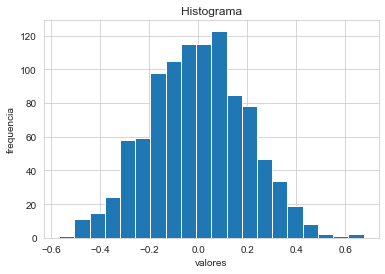

In [64]:
# Graficando histograma
mu, sigma = 0, 0.2 # media y desvio estandar
datos = np.random.normal(mu, sigma, 1000) #creando muestra de datos (distribución normal)

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

Otra forma de representar a las distribuciones discretas es utilizando su **Función de Masa de Probabilidad o PMF** en inglés, la cual relaciona cada valor con su probabilidad en lugar de su frecuencia como vimos anteriormente. Esta función es normalizada de forma tal que el valor total de probabilidad sea 1. La ventaja que nos ofrece utilizar la FMP es que podemos comparar dos distribuciones sin necesidad de ser confundidos por las diferencias en el tamaño de las muestras. También debemos tener en cuenta que FMP funciona bien si el número de valores es pequeño;

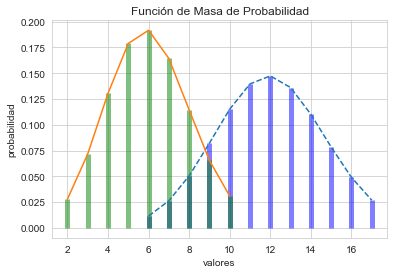

In [65]:
# Graficando FMP
n, p = 30, 0.4 # parametros de forma de la distribución binomial
n_1, p_1 = 20, 0.3 # parametros de forma de la distribución binomial
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))
x_1 = np.arange(stats.binom.ppf(0.01, n_1, p_1),
              stats.binom.ppf(0.99, n_1, p_1))
fmp = stats.binom.pmf(x, n, p) # Función de Masa de Probabilidad
fmp_1 = stats.binom.pmf(x_1, n_1, p_1) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.plot(x_1, fmp_1)
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.vlines(x_1, 0, fmp_1, colors='g', lw=5, alpha=0.5)
plt.title('Función de Masa de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

El equivalente a la PMF para distribuciones continuas es la **Función de Densidad de Probabilidad o PDF**. Esta función es la derivada de la Función de Distribución Acumulada. Por ejemplo, para la distribución normal que graficamos anteriormente, su PDF es la siguiente

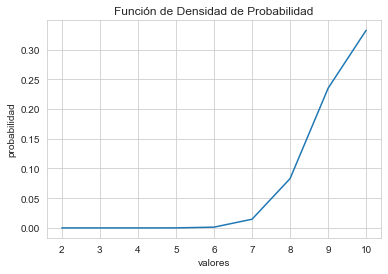

In [66]:
# Graficando Función de Densidad de Probibilidad con Python
FDP_normal = stats.norm(10, 1.2).pdf(x_1) # FDP
plt.plot(x_1, FDP_normal, label='FDP nomal')
plt.title('Función de Densidad de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

Si queremos evitar los problemas que se generan con FMP cuando el número de valores es muy grande, podemos recurrir a utilizar la **Función de Distribución Acumulada o CDF**, para representar a nuestras distribuciones, tanto discretas como continuas. Esta función relaciona los valores con su correspondiente percentil; es decir que va a describir la probabilidad de que una variable aleatoria X sujeta a cierta ley de distribución de probabilidad se sitúe en la zona de valores menores o iguales a x.

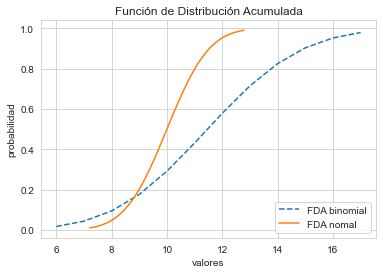

In [67]:
# Graficando Función de Distribución Acumulada con Python
x_1 = np.linspace(stats.norm(10, 1.2).ppf(0.01),
                  stats.norm(10, 1.2).ppf(0.99), 100)
fda_binom = stats.binom.cdf(x, n, p) # Función de Distribución Acumulada
fda_normal = stats.norm(10, 1.2).cdf(x_1) # Función de Distribución Acumulada
plt.plot(x, fda_binom, '--', label='FDA binomial')
plt.plot(x_1, fda_normal, label='FDA nomal')
plt.title('Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=4)
plt.show()

###  Tipos

**Distribución binomial:**

Distribución de probabilidad discreta que cuenta el número de éxitos en una secuencia de $n$ ensayos de Bernoulli independientes entre sí con una probabilidad fija $p$ de ocurrencia de éxito entre los ensayos. Un experimento de Bernoulli se caracteriza por ser dicotómico, esto es, solo dos resultados son posibles, a uno de estos se le denomina “éxito” y tiene una probabilidad de ocurrencia $p$ y al otro se le denomina “fracaso” y tiene una probabilidad $q=1-p$
    
<ins>Función de probabilidad</ins>
    
$$ P \left[\begin{array}{r}X=x\end{array}\right]= \left(\begin{array}{rr}n \\ x \end{array}\right)p^x \left(1-p\right)^{n-x} $$
    
<ins>Función de distribución acumulada</ins>

$$ P \left[\begin{array}{r}X\leq x\end{array}\right]=\sum_{k=0}^{x} \left(\begin{array}{rr}n \\ k \end{array}\right)p^k \left(1-p\right)^{n-k} $$

En python podemos hallar la distribución binomial con la función [`scipy.stats.binom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)

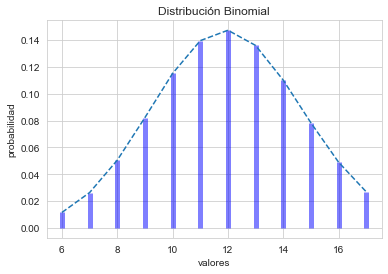

In [68]:
# Graficando Binomial
N, p = 30, 0.4 # parametros de forma 
binomial = stats.binom(N, p) # Distribución
x = np.arange(binomial.ppf(0.01),
              binomial.ppf(0.99))
fmp = binomial.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


**Distribución Poisson:**

La Distribución Poisson describe la probabilidad de encontrar exactamente r eventos en un lapso de tiempo si los acontecimientos se producen de forma independiente a una velocidad constante μ. Es una de las distribuciones más utilizadas en estadística con varias aplicaciones; como por ejemplo describir el número de fallos en un lote de materiales o la cantidad de llegadas por hora a un centro de servicios
    
<ins>Función de probabilidad</ins>
    
$$ P \left(r;\mu\right)= \frac{\mu^r e^{-\mu}}{r!} $$

En dónde r es un entero (r≥0) y μ es un número real positivo.

En python podemos hallar la distribución de poisson con la función [`scipy.stats.poisson`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)

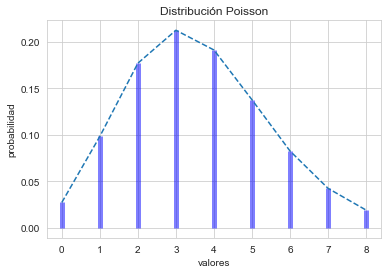

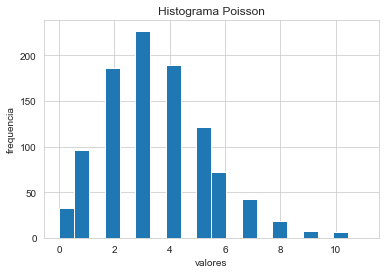

In [69]:
# Graficando Poisson
mu =  3.6 # parametro de forma 
poisson = stats.poisson(mu) # Distribución
x = np.arange(poisson.ppf(0.01),
              poisson.ppf(0.99))
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

# histograma
aleatorios = poisson.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Poisson')
plt.show()


**Distribución Hipergeométrica:**

La Distribución Hipergeométrica describe experimentos en donde se seleccionan los elementos al azar sin reemplazo (se evita seleccionar el mismo elemento más de una vez). Más precisamente, supongamos que tenemos N elementos de los cuales M tienen un cierto atributo (y N−M no tiene). Si escogemos n elementos al azar sin reemplazo, p(r) es la probabilidad de que exactamente r de los elementos seleccionados provienen del grupo con el atributo.
    
<ins>Función de probabilidad</ins>
    
$$ P \left(r;n,N,M\right)= \frac{\left(\begin{array}{rr} M \\ r \end{array}\right) \left(\begin{array}{rr} N-M \\ n-r \end{array}\right)}{\left(\begin{array}{rr}N \\ n \end{array}\right)} $$

En dónde el valor de r esta limitado por max(0,n−N+M) y min(n,M) inclusive; y los parámetros n (1≤n≤N), N (N≥1) y M (M≥1) son todos números enteros.

En python podemos hallar la distribución hipergeométrica con la función [`scipy.stats.hypergeom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html)

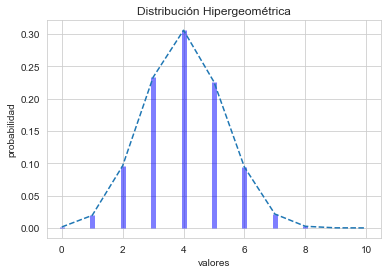

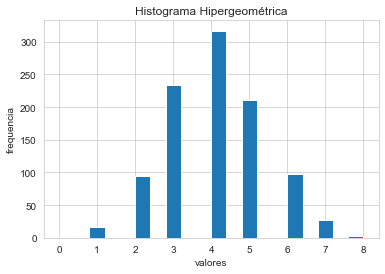

In [70]:

# Graficando Hipergeométrica
M, n, N = 30, 10, 12 # parametros de forma 
hipergeometrica = stats.hypergeom(M, n, N) # Distribución
x = np.arange(0, n+1)
fmp = hipergeometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Hipergeométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

# histograma
aleatorios = hipergeometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Hipergeométrica')
plt.show()

**Distribución Normal o Gaussiana:**
Es la distribución más utilizada en estadística
Algunos ejemplos de variables asociadas a fenómenos naturales que siguen el modelo de la Distribución Normal son:

- Características morfológicas de individuos, como la estatura;
- Características sociológicas, como el consumo de cierto producto por un mismo grupo de individuos;
- Características psicológicas, como el cociente intelectual;
- Nivel de ruido en telecomunicaciones;

<ins>Función de probabilidad</ins>
    
$$ P \left(r;\mu ,\sigma ^2\right)= {\frac{1}{\sigma \sqrt{2\pi}}} e^{\frac{-1}{2} \left(\frac{x-\mu}{\sigma}\right) ^2} $$

En dónde $\mu$ es el parámetro de ubicación, y va a ser igual a la media aritmética y $\sigma ^2$ es el desvío estándar. 

En python podemos hallar la distribución gaussiana con la función [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

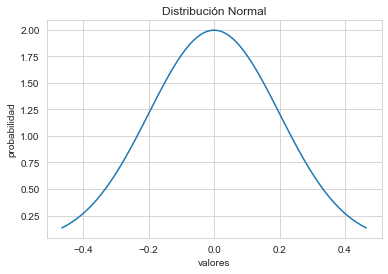

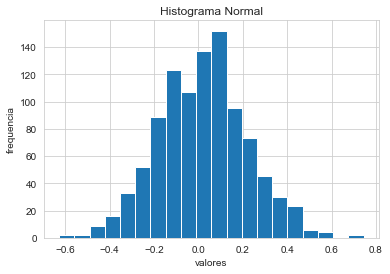

In [71]:
# Graficando Normal
mu, sigma = 0, 0.2 # media y desvio estandar
normal = stats.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


# histograma
aleatorios = normal.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Normal')
plt.show()